In [2]:
import pytesseract
from pytesseract import Output
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def grayscale_plot(filepath):
    img = Image.open(filepath).convert('L')
    WIDTH, HEIGHT = img.size
    #print("1:::",WIDTH,HEIGHT,":::1")
    pix = img.load()
    #print("1:::",pix,":::1")
    data = np.asarray(img.getdata())
    #print("1:::",data,":::1")
    data = data.reshape((HEIGHT,WIDTH))
    #print("1:::",data,":::1")
    fig,ax = plt.subplots()
    reduced_data = data.mean(axis=0)
    #print("1:::",reduced_data,":::1")
    ax.plot(reduced_data)
    plt.show()
    plt.imshow(img)
    return reduced_data,WIDTH,HEIGHT


In [4]:
def tess(img1):

    d = pytesseract.image_to_data(img1, output_type=Output.DICT)
    n_boxes = len(d['level'])
    bboxtxt_list=[]
    for i in range(n_boxes):
        if(d['text'][i] != ""):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            #cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)
            bboxtxt_list.append(d['text'][i])
    return bboxtxt_list

In [5]:
def verticle_sep_size(reduced_data):
    sep=[]

    for i in range(len(reduced_data)):
        if(reduced_data[i]<130):
            sep.append(i)
    sep_size=[sep[0]]
    for i in range(len(sep)-1):
        sep_size.append(sep[i+1]-sep[i])
    return sep,sep_size
        
def verticle_op(filepath):
    red_data,WIDTH,HEIGHT=grayscale_plot(filepath)
    sep,sep_size=verticle_sep_size(red_data)
    image = cv2.imread(filepath)
    y=0
    x=0
    h=HEIGHT
    final_op={}
    q=0
    for i in range(len(sep_size)):
        w=sep_size[i]
        crop = image[y:y+h, x:x+w]
        fin_lst=tess(crop)
        if(len(fin_lst)!=0):
            final_op[q]=fin_lst
            q+=1
        x=sep[i]
        cv2.imshow('Image', crop)
        cv2.waitKey(0) 
    return final_op
        

In [10]:
def c_sep_size1(reduced_data,WIDTH):
    p=[]
    c_sep=[]
    c_sep1=[]
    c_sep_size=[]
    for i in range(11,len(reduced_data)-10):
        if(reduced_data[i-3]==255. and reduced_data[i+3]==255.):
            p.append(i)
    for a in range(len(p)-1):
        if(p[a+1]-p[a]>30):
            c_sep.append(p[a])
    c_sep.append(p[-1])

    for i in range(0,len(c_sep)-1):
        if(c_sep[i+1]-c_sep[i]!=1):
            c_sep1.append(c_sep[i])
    c_sep1.append(c_sep[-1])
    c_sep1.append(WIDTH)
    c_sep_size.append(c_sep1[0])
    for i in range(len(c_sep1)-1):
        c_sep_size.append(c_sep1[i+1]-c_sep1[i])
    #c_sep_size.append(c_sep[-1]-c_sep1[-1])
    return c_sep,c_sep1,c_sep_size

def multi_op(filepath):
    red_data,WIDTH,HEIGHT=grayscale_plot(filepath)
    c_sep,c_sep1,c_sep_size=c_sep_size1(red_data,WIDTH)
    image = cv2.imread(filepath)
    y=0
    x=0
    h=HEIGHT
    final_op={}
    q=0
    for i in range(len(c_sep_size)):
        w=c_sep_size[i]
        crop = image[y:y+h, x:x+w]
        fin_lst=tess(crop)
        if(len(fin_lst)!=0):
            final_op[q]=fin_lst
            q+=1
        x=c_sep1[i]
        cv2.imshow('Image', crop)
        cv2.waitKey(0) 
    return final_op
    

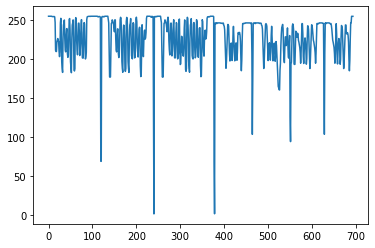

{0: ['Station'], 1: ['Latitude'], 2: ['Longitude'], 3: ['1993'], 4: ['Ye', '1994'], 5: ['2012']}


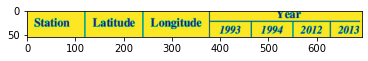

In [13]:
print(verticle_op("d1.jpg"))